In [4]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../Covid_19 Project/Newfeat.csv')

# Print the data types of each column
print(df.dtypes)


file                        object
zcr                         object
energy                      object
energy_entropy              object
spectral_centroid           object
                             ...  
delta chroma_10             object
delta chroma_11             object
delta chroma_12             object
delta chroma_std            object
metadata_compiled.status    object
Length: 70, dtype: object


In [5]:

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Read the CSV file


# Get the number of rows and columns
num_rows, num_cols = df.shape

# Create a 3D numpy array to store the data
data = np.zeros((num_rows, num_cols-2, 24))

# Loop through each row and column of the DataFrame
for i in range(num_rows):
    for j in range(1, num_cols-1):
        values = df.iloc[i, j]
        values = values.replace('[', '').replace(']', '').split(', ')
        values = [float(v) for v in values]
        # Pad the sequence with zeros to make it length 24
        padded_values = np.zeros(24)
        padded_values[:len(values)] = values
        data[i, j-1, :] = padded_values

# Reshape the data to a 3D matrix
data = data.reshape((num_rows, -1, 24))

output = df.iloc[:, -1].values







In [3]:
print(data)

[[[ 7.44777475e-02  7.62942779e-02  5.72207084e-02 ...  6.81198910e-02
    5.81289737e-02  5.17711172e-02]
  [ 6.38268534e-02  4.84629162e-02  5.51602157e-02 ...  4.32908613e-03
    4.16512662e-02  1.58931829e-02]
  [ 2.82240837e+00  3.03698096e+00  3.07573740e+00 ...  2.99709138e+00
    2.75382357e+00  2.48133430e+00]
  ...
  [ 0.00000000e+00  6.03236929e-04 -1.26633185e-03 ... -1.10800209e-02
    6.02947442e-03  6.71171448e-04]
  [ 0.00000000e+00 -2.64465459e-04  2.83986887e-05 ... -6.12823833e-03
   -5.51542424e-03  5.77681842e-04]
  [ 0.00000000e+00 -9.96328928e-03  9.74140146e-03 ...  1.73734843e-03
    1.14471140e-03 -6.16862799e-04]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.72570391e-02
    1.72570391e-02  1.08991826e-02]
  [ 8.52910638e-08  8.42965479e-08  8.53970782e-08 ...  1.53510991e-01
    1.12715717e-01  9.80484802e-02]
  [ 3.30350133e+00  3.30546233e+00  3.30716201e+00 ...  3.01409526e+00
    3.06913192e+00  2.96613559e+00]
  ...
  [ 0.00000000e+00  2.0

In [5]:
print(np.min(data))

-99.00180475409627


In [6]:
import numpy as np
def NormalizeData(dt):
    return (dt - np.min(dt)) / (np.max(dt) - np.min(dt))
X = np.array(data)
scaled_x = NormalizeData(X)
print(scaled_x)

[[[0.56611052 0.5661209  0.56601192 ... 0.5660742  0.56601711 0.56598078]
  [0.56604967 0.56596188 0.56600015 ... 0.5657097  0.56592296 0.56577578]
  [0.58181188 0.58303793 0.58325938 ... 0.58281    0.58142    0.57986303]
  ...
  [0.56568497 0.56568841 0.56567773 ... 0.56562166 0.56571942 0.5656888 ]
  [0.56568497 0.56568346 0.56568513 ... 0.56564995 0.56565345 0.56568827]
  [0.56568497 0.56562804 0.56574063 ... 0.56569489 0.56569151 0.56568144]]

 [[0.56568497 0.56568497 0.56568497 ... 0.56578357 0.56578357 0.56574724]
  [0.56568497 0.56568497 0.56568497 ... 0.56656211 0.56632901 0.5662452 ]
  [0.58456079 0.584572   0.58458171 ... 0.58290716 0.58322163 0.58263313]
  ...
  [0.56568497 0.56568613 0.56568394 ... 0.5655906  0.5656861  0.56574798]
  [0.56568497 0.56568497 0.56568495 ... 0.56568348 0.5656837  0.56568466]
  [0.56568497 0.56568288 0.56568773 ... 0.56578412 0.56570417 0.56564602]]

 [[0.56583028 0.56596521 0.56610014 ... 0.56601711 0.56603268 0.56604306]
  [0.56613097 0.565758

In [7]:




label_encoder = LabelBinarizer()
y = label_encoder.fit_transform(output)
x = np.transpose(scaled_x, axes=(0, 2, 1))




In [16]:
print(x.shape)
print(y.shape)

(1545, 24, 68)
(1545, 1)


In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
import keras as ks
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


# convert data to numpy arrays
X = np.array(x)
y = np.array(y)


In [9]:
print('Input shape:', X.shape)
print('Output shape:', y.shape)

Input shape: (1545, 24, 68)
Output shape: (1545, 1)


In [19]:
import librosa
import glob
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Folder containing audio files
audio_folder = '../Covid_19 Project/new_folder/'

# Path to the CSV file containing file names and corresponding statuses
csv_file = '../Covid_19 Project/Newfeat.csv'

labels_df = pd.read_csv(csv_file)
# Append ".csv" extension to the file names in the CSV file
labels_df['file'] = labels_df['file'].astype(str) + ".csv"

# Retrieve audio file paths within the folder
audio_files = glob.glob(audio_folder + '/*.wav')

# Lists to store the extracted features and labels
features = []
labels = []

In [20]:
import os
import numpy as np
from PIL import Image
import pandas as pd

csv_file = '../Covid_19 Project/Newfeat.csv'

# Folder containing audio files
audio_folder = '../Covid_19 Project/Newfeat.csv'

# Output folders for each feature
image_folder_mfcc = '../Covid_19 Project/mfcc1'
image_folder_mel = '../Covid_19 Project/mel1'
image_folder_chroma = '../Covid_19 Project/chroma1'

# Read the CSV file
status_df = pd.read_csv(csv_file)

# Dictionary to store the status for each image file
image_status = {}

# Process each image file in the folders
for image_file in os.listdir(image_folder_mfcc):
    if image_file.endswith('.png'):
        image_path = os.path.join(image_folder_mfcc, image_file)
        file_name = image_file.replace('.png', '')
        
        # Get the status of the current image file from the CSV file
        status = status_df[status_df['file'] == file_name]['metadata_compiled.status'].values
        
        if len(status) > 0:
            image_status[image_path] = status[0]

for image_file in os.listdir(image_folder_mel):
    if image_file.endswith('.png'):
        image_path = os.path.join(image_folder_mel, image_file)
        file_name = image_file.replace('.png', '')
        
        # Get the status of the current image file from the CSV file
        status = status_df[status_df['file'] == file_name]['metadata_compiled.status'].values
        
        if len(status) > 0:
            image_status[image_path] = status[0]

for image_file in os.listdir(image_folder_chroma):
    if image_file.endswith('.png'):
        image_path = os.path.join(image_folder_chroma, image_file)
        file_name = image_file.replace('.png', '')
        
        # Get the status of the current image file from the CSV file
        status = status_df[status_df['file'] == file_name]['metadata_compiled.status'].values
        
        if len(status) > 0:
            image_status[image_path] = status[0]

# Print the status for each image file
for image_path, status in image_status.items():
    print(f"Image: {image_path}, Status: {status}")


Image: ../Covid_19 Project/mfcc1\001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\005b8518-03ba-4bf5-86d2-005541442357.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\005bca13-18d1-4514-a086-cc8c3fafeeb2.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\008ba489-31ad-44d8-856b-fcf72369dc46.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\00bf9f83-2e8f-47cf-a4f2-97f2beceebc1.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\015576c8-2b03-4dcb-b251-78a984fe86fe.png, Status: COVID-19
Image: ../Covid_19 Project/mfcc1\020158eb-9cb5-4977-8131-840cdaf199b4.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\027a525e-fe55-41d5-bf07-38eda9c56554.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\0311ee9e-b265-4767-ba51-f3fc8176747a.png, Status: healthy
Image: ../Covid_19 Project/mfcc1\031fd54a-87b5-4223-9af6-60985127fb7a.png, Status: COVID-19
Image: ../Covid_19 Project/mfcc1\033da4e3-7365-4adc-9252-7347816e4e77.png, Status: COVID

In [21]:
import os
import tensorflow as tf
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Output folders for each feature
image_folder_mfcc = '../Covid_19 Project/mfcc1'
image_folder_mel = '../Covid_19 Project/mel1'
image_folder_chroma = '../Covid_19 Project/chroma1'


features = []
statuses = []





# Process each image file in the folders
for image_file in os.listdir(image_folder_mfcc):
    if image_file.endswith('.png'):
        file_name = image_file.replace('.png', '')
        mfcc_image_path = os.path.join(image_folder_mfcc, image_file)
        mel_image_path = os.path.join(image_folder_mel, file_name + '.png')
        chroma_image_path = os.path.join(image_folder_chroma, file_name + '.png')
        
        # Load and preprocess the image features
        mfcc_image = Image.open(mfcc_image_path)
        mel_image = Image.open(mel_image_path)
        chroma_image = Image.open(chroma_image_path)
        
        # Resize the images if needed (adjust the size according to your requirements)
        mfcc_image = mfcc_image.resize((256,256 ))
        mel_image = mel_image.resize((256,256))
        chroma_image = chroma_image.resize((256,256))
        
        # Convert the images to numpy arrays
        mfcc_array = np.array(mfcc_image)
        mel_array = np.array(mel_image)
        chroma_array = np.array(chroma_image)
        
        combined_array = np.concatenate((mfcc_array, mel_array, chroma_array), axis=-1)

        features.append(combined_array) 
        statuses.append(image_status[mfcc_image_path])  
        # Use the dictionary to get the status
        
        


# Convert the lists to numpy arrays
features = np.array(features)
statuses = np.array(statuses)


In [22]:

label_encoder1 = LabelBinarizer()
y1 = label_encoder.fit_transform(statuses)
x1 = features




In [24]:
print('Input shape:', x1.shape)
print('Output shape:', y1.shape)

Input shape: (1545, 256, 256, 12)
Output shape: (1545, 1)


In [33]:

X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
x_train = X_train.astype("float32") 
x_test = X_test.astype("float32") 
# x1_train = X1_train.astype("float32") 
# x1_test = X1_test.astype("float32") 


In [30]:

print(x_test.shape)
print(y_test.shape)


print(x_train.shape)
print(y_train.shape)

(464, 24, 68)
(464, 1)
(1081, 24, 68)
(1081, 1)


import tensorflow as tf
from tensorflow.keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Assuming your validation accuracy metric is set as 'accuracy' during model compilation
objective = 'val_accuracy'

# Define the function to build the model with tunable hyperparameters
def build_model(hp):
    model = tf.keras.Sequential()

    # Choose the number of LSTM layers
    num_lstm_layers = hp.Int('num_lstm_layers', min_value=5, max_value=10, default=6)
    for i in range(num_lstm_layers):
        lstm_units = hp.Choice(f'lstm_units_layer{i}', values=[32, 64, 128, 256])
        activation_lstm = hp.Choice(f'activation_lstm_layer{i}', values=['relu', 'tanh', 'sigmoid'])
        return_sequences = i < num_lstm_layers - 1  # Set return_sequences to True for all but the last layer
        if i == 0:
            model.add(layers.LSTM(units=lstm_units, activation=activation_lstm, return_sequences=True,
                                  input_shape=(24, 68)))
        else:
            model.add(layers.LSTM(units=lstm_units, activation=activation_lstm, return_sequences=return_sequences))

    # Choose the number of Dense layers
    num_dense_layers = hp.Int('num_dense_layers', min_value=4, max_value=10, default=5)
    for i in range(num_dense_layers):
        dense_units = hp.Choice(f'dense_units_layer{i}', values=[32, 64, 128, 256])
        activation_dense = hp.Choice(f'activation_dense_layer{i}', values=['relu', 'tanh', 'sigmoid'])
        model.add(layers.Dense(units=dense_units, activation=activation_dense))

    # Choose the dropout rate
    hp_dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    model.add(layers.Dropout(rate=hp_dropout_rate))

    # Output layer with 2 classes and softmax activation
    model.add(layers.Dense(2, activation='softmax'))

    # Choose the optimizer
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    if hp_optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    elif hp_optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    else:
        optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

    # Compile the model with the chosen optimizer
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Initialize the tuner with the build_model function and the objective
tuner = RandomSearch(
    build_model,
    objective=objective,
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_directory',
    project_name='my_tuning_project'
)

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=10, validation_split=0.2)

# Get the best model and evaluate it on the test data
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)


# Assuming you have the train and test data (x_train, y_train, x_test, y_test)
model = create_lstm_model()

# Train the model on the training data
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

# Retrieve the best hyperparameters for the complicated LSTM model
best_lstm_hyperparameters = complex08_lstm_tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_lstm_hyperparameters.values)

# Retrieve the best LSTM model
best_lstm_model = complex08_lstm_tuner.get_best_models(num_models=1)[0]


import tensorflow as tf
from tensorflow.keras import layers
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

def build_cnn_model(hp):
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(filters=hp.Choice('num_filters', values=[32, 64, 128]),
                             kernel_size=hp.Choice('kernel_size', values=[3, 5]),
                             activation='relu',
                             input_shape=(256, 256, 12)))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Choice('dense_units', values=[64, 128, 256]), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Define the tuner for CNN
cnn_tuner = RandomSearch(
    build_cnn_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='cnn_hyperparam_tuning',
    project_name='cnn_tuning'
)

# Perform hyperparameter search for CNN
cnn_tuner.search(x1_train, y1_train, epochs=10, validation_split=0.2)


best_cnn_model = cnn_tuner.get_best_models(num_models=1)[0]


# Retrieve the best hyperparameters for the LSTM model
best_cnn_hyperparameters = cnn_tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_cnn_hyperparameters.values)


In [46]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Define your LSTM model as a function
def create_lstm_model(units=128, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(24, 68), activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model in KerasRegressor
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# Define hyperparameters to search over
param_grid = {
    'units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Perform grid search
grid = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the best parameters and results
print("Best Parameters:", grid_result.best_params_)
print("Best MSE:", -grid_result.best_score_)  # Negative of mean squared error since GridSearchCV tries to maximize


C:\Users\User\AppData\Local\Temp\ipykernel_13384\2527926518.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)


Best Parameters: {'dropout_rate': 0.2, 'units': 256}
Best MSE: 0.2440062165260315


In [65]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Define your LSTM model as a function
def create_lstm_model(units=128, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(24, 68), activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    
    # Add an additional LSTM layer
    model.add(LSTM(units=units, activation='relu', return_sequences=True))
    
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model in KerasRegressor
lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)

# Define hyperparameters to search over
param_grid = {
    'units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4]
}

# Perform grid search
grid = GridSearchCV(estimator=lstm_regressor, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train, y_train)

# Print the best parameters and results
print("Best Parameters:", grid_result.best_params_)
print("Best MSE:", -grid_result.best_score_)  # Negative of mean squared error since GridSearchCV tries to maximize


C:\Users\User\AppData\Local\Temp\ipykernel_13384\1276176382.py:21: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_regressor = KerasRegressor(build_fn=create_lstm_model, verbose=0)


Best Parameters: {'dropout_rate': 0.4, 'units': 256}
Best MSE: 0.25721728801727295


In [16]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a new LSTM model with the best parameters
best_dropout_rate = 0.2
best_units = 256

improved_model = Sequential()
improved_model.add(LSTM(units=best_units, input_shape=(24, 68), activation='relu', return_sequences=True))
improved_model.add(Dropout(best_dropout_rate))





improved_model.add(LSTM(units=128, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=64, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=32, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=8, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=2, activation='relu', return_sequences=True))

improved_model.add(Dense(units=1, activation='linear'))
improved_model.compile(optimizer='adam', loss='mean_squared_error')

# Use Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the improved model
history_improved = improved_model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Plot training and validation loss curves
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Improved Model)')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss_improved = improved_model.evaluate(x_test, y_test)
print("Test Loss (Improved Model):", test_loss_improved)


Epoch 1/30
34/34 [==============================] - 22s 392ms/step - loss: 0.6110 - val_loss: 0.5722
Epoch 2/30
34/34 [==============================] - 10s 284ms/step - loss: 0.5711 - val_loss: 0.5353
Epoch 3/30
34/34 [==============================] - 10s 289ms/step - loss: 0.5347 - val_loss: 0.5015
Epoch 4/30
34/34 [==============================] - 12s 345ms/step - loss: 0.5014 - val_loss: 0.4708
Epoch 5/30
34/34 [==============================] - 13s 393ms/step - loss: 0.4707 - val_loss: 0.4433
Epoch 6/30
34/34 [==============================] - 12s 343ms/step - loss: 0.4430 - val_loss: 0.4177
Epoch 7/30
 5/34 [===>..........................] - ETA: 8s - loss: 0.4399

KeyboardInterrupt: 

In [83]:
y_pred = model_lstm.predict(x_test)
num_elements_to_print = 10  # Change this to the number of elements you want to print

for i in range(num_elements_to_print):
    print("Predicted:", y_pred[i].flatten())
    print("Actual:", y_test[i].flatten())
    print()

15/15 [==============================] - 1s 43ms/step
Predicted: [0.6414337  0.60528433 0.62708604 0.6268573  0.63552946 0.6318941
 0.63251066 0.63245726 0.63273025 0.6327487  0.63293767 0.63295376
 0.6325672  0.6321969  0.63281524 0.6325146  0.6325529  0.63254863
 0.6319774  0.63205755 0.6320734  0.6266321  0.63124096 0.6305234 ]
Actual: [1]

Predicted: [0.6471089  0.6075533  0.62971795 0.62902343 0.6309149  0.63158494
 0.63191426 0.6321981  0.6324789  0.63269675 0.6323688  0.6326663
 0.6327391  0.63239783 0.63270724 0.63283    0.63296354 0.63278484
 0.6328667  0.63269055 0.6330094  0.63272715 0.6329123  0.632702  ]
Actual: [1]

Predicted: [0.6414337  0.60528433 0.62708604 0.6268573  0.62892216 0.62962466
 0.63014734 0.63043517 0.63773173 0.632262   0.6330832  0.6331211
 0.63282    0.6328886  0.63287663 0.63271964 0.63295144 0.6326337
 0.63283086 0.6326712  0.63261575 0.63291657 0.6328116  0.63231397]
Actual: [1]

Predicted: [0.6414337  0.61065876 0.62840295 0.63038445 0.6308205  0.63

NameError: name 'history_improved' is not defined

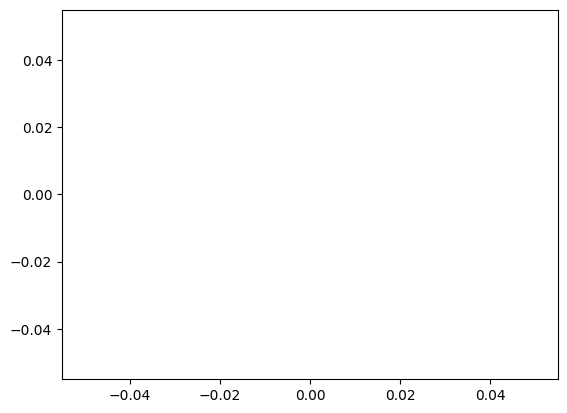

In [3]:
import matplotlib.pyplot as plt

plt.plot()
plt.plot(history_improved.history['loss'], label='LSTM - Training')
plt.plot(history_improved.history['val_loss'], label='LSTM - Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/100
34/34 [==============================] - 27s 584ms/step - loss: 0.6289 - accuracy: 0.3691 - val_loss: 0.6079 - val_accuracy: 0.3879
Epoch 2/100
34/34 [==============================] - 17s 495ms/step - loss: 0.6246 - accuracy: 0.3691 - val_loss: 0.6039 - val_accuracy: 0.3879
Epoch 3/100
34/34 [==============================] - 17s 501ms/step - loss: 0.6204 - accuracy: 0.3691 - val_loss: 0.5998 - val_accuracy: 0.3879
Epoch 4/100
34/34 [==============================] - 17s 499ms/step - loss: 0.6163 - accuracy: 0.3691 - val_loss: 0.5958 - val_accuracy: 0.3879
Epoch 5/100
34/34 [==============================] - 17s 514ms/step - loss: 0.6122 - accuracy: 0.3691 - val_loss: 0.5918 - val_accuracy: 0.3879
Epoch 6/100
34/34 [==============================] - 17s 513ms/step - loss: 0.6080 - accuracy: 0.3691 - val_loss: 0.5879 - val_accuracy: 0.3879
Epoch 7/100
34/34 [==============================] - 18s 519ms/step - loss: 0.6040 - accuracy: 0.3691 - val_loss: 0.5840 - val_accuracy:

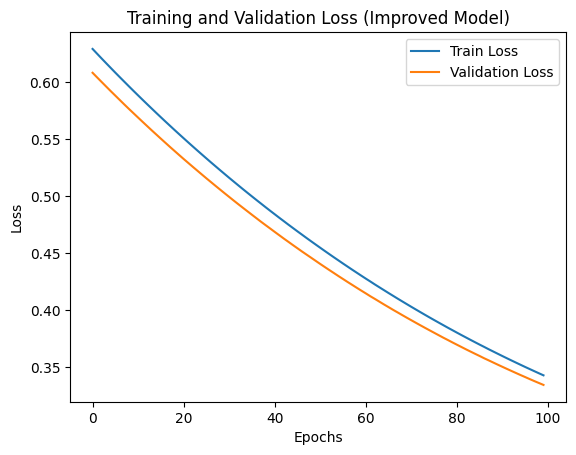

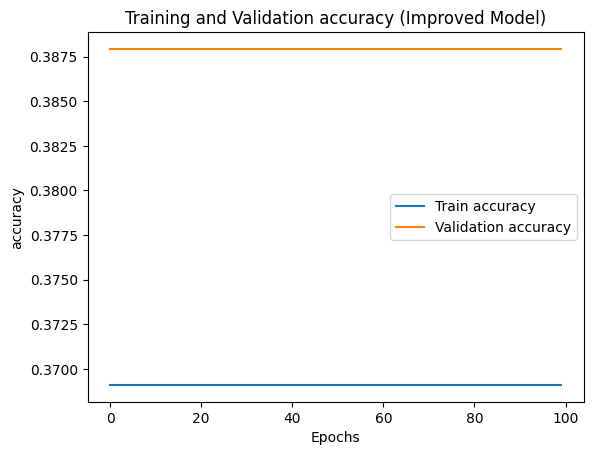

In [42]:
import keras as ks 
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Create a new LSTM model with the best parameters
best_dropout_rate = 0.2
best_units = 256

improved_model = Sequential()
improved_model.add(LSTM(units=best_units, input_shape=(24, 68), activation='relu', return_sequences=True))
improved_model.add(Dropout(best_dropout_rate))

improved_model.add(LSTM(units=128, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=64, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=32, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=8, activation='relu', return_sequences=True))

improved_model.add(LSTM(units=2, activation='relu', return_sequences=True))

improved_model.add(Dense(units=1, activation='linear'))

optimiser = ks.optimizers.Adam(learning_rate=0.0001)

improved_model.compile(optimizer= optimiser, loss='mean_squared_error', metrics=['accuracy'])  # Change the loss function

# Use Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the improved model
history_improved = improved_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])

# Plot training and validation loss curves
plt.plot(history_improved.history['loss'], label='Train Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Improved Model)')
plt.legend()
plt.show()

# Plot training and validation loss curves
plt.plot(history_improved.history['accuracy'], label='Train accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy (Improved Model)')
plt.legend()
plt.show()





In [38]:
lstm_loss, lstm_accuracy = improved_model.evaluate(x_test, y_test)
print("LSTM - Loss: {:.4f}, Accuracy: {:.4f}".format(lstm_loss, lstm_accuracy))

15/15 [==============================] - 1s 88ms/step - loss: 0.2493 - mean_squared_error: 0.2493
LSTM - Loss: 0.2493, Accuracy: 0.2493


In [40]:
y_pred = improved_model.predict(X_test)
for i in  range(30):
    print(y_pred[i], y_test[i])

15/15 [==============================] - 1s 89ms/step
[[0.11905639]
 [0.6815326 ]
 [0.7012298 ]
 [0.6749359 ]
 [0.71867335]
 [0.67312247]
 [0.6495364 ]
 [0.6395573 ]
 [0.63513595]
 [0.63318115]
 [0.63231945]
 [0.6319402 ]
 [0.63177353]
 [0.6317006 ]
 [0.6316687 ]
 [0.6316548 ]
 [0.63164884]
 [0.6316463 ]
 [0.63164514]
 [0.6316448 ]
 [0.63164455]
 [0.6316444 ]
 [0.6316445 ]
 [0.6316445 ]] [1]
[[0.12011272]
 [0.6915192 ]
 [0.70486516]
 [0.6794609 ]
 [0.7187473 ]
 [0.6730653 ]
 [0.64999133]
 [0.64022464]
 [0.6359038 ]
 [0.63399684]
 [0.63315755]
 [0.63278884]
 [0.63262695]
 [0.63255626]
 [0.6325254 ]
 [0.6325119 ]
 [0.6325061 ]
 [0.63250357]
 [0.6325025 ]
 [0.6325021 ]
 [0.6325019 ]
 [0.6325018 ]
 [0.63250184]
 [0.6325018 ]] [1]
[[0.11905639]
 [0.6815326 ]
 [0.7012298 ]
 [0.6749359 ]
 [0.71876895]
 [0.67325187]
 [0.6496479 ]
 [0.63966256]
 [0.6352399 ]
 [0.63328475]
 [0.63242316]
 [0.6320439 ]
 [0.63187736]
 [0.63180447]
 [0.6317725 ]
 [0.6317587 ]
 [0.63175267]
 [0.6317501 ]
 [0.63174903

15/15 [==============================] - 1s 97ms/step


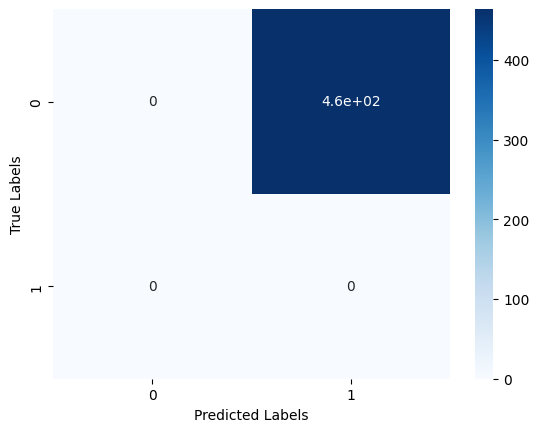

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = improved_model.predict(x_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [84]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import numpy as np

# Load or create your x_train, y_train, x_test, y_test

# Define your LSTM model as a function
def create_lstm_model(units=256, dropout_rate=0.2):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(24, 68), activation='relu', return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))  # Change the activation function
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change the loss function
    return model

# Create and compile the model
model_lstm = create_lstm_model()

# Train the model
model_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model_lstm.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
34/34 [==============================] - 5s 104ms/step - loss: 0.6663 - accuracy: 0.6290 - val_loss: 0.6691 - val_accuracy: 0.6121
Epoch 2/10
34/34 [==============================] - 3s 99ms/step - loss: 0.6609 - accuracy: 0.6309 - val_loss: 0.6777 - val_accuracy: 0.6121
Epoch 3/10
34/34 [==============================] - 3s 99ms/step - loss: 0.6619 - accuracy: 0.6309 - val_loss: 0.6682 - val_accuracy: 0.6121
Epoch 4/10
34/34 [==============================] - 3s 101ms/step - loss: 0.6596 - accuracy: 0.6309 - val_loss: 0.6690 - val_accuracy: 0.6121
Epoch 5/10
34/34 [==============================] - 3s 100ms/step - loss: 0.6607 - accuracy: 0.6309 - val_loss: 0.6721 - val_accuracy: 0.6121
Epoch 6/10
34/34 [==============================] - 3s 99ms/step - loss: 0.6595 - accuracy: 0.6309 - val_loss: 0.6682 - val_accuracy: 0.6121
Epoch 7/10
34/34 [==============================] - 3s 99ms/step - loss: 0.6606 - accuracy: 0.6309 - val_loss: 0.6685 - val_accuracy: 0.6121
Epoch 8/10

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Conv2D, Flatten, Dropout
from sklearn.ensemble import VotingClassifier


# Define input and output shapes
n_timesteps = 24
n_features = 68 
n_outputs = 1



# Define droupout rate
Dropout_rate = 0.6

# Define learning rate
learning_rate = 0.001

# Define activation_function 
activation_function = 'softmax'





# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(100, dropout=0.6, return_sequences=True, input_shape=(n_timesteps, n_features)))
model_lstm.add(LSTM(100, dropout=0.6))

model_lstm.add(Dense(128))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(128, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(256, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(128, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(64, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(32, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(16, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(8, activation='softmax'))
model_lstm.add(Dropout(Dropout_rate))

model_lstm.add(Dense(2, activation='softmax'))

model_lstm.add(Dense(1, activation='softmax'))






model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])



# Create CNN Model
model_cnn = Sequential()
model_cnn.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 12)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(256, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))




model_cnn.add(Conv2D(128, (2,2), activation='relu'))
model_cnn.add(MaxPooling2D((1, 1)))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))


model_cnn.add(Conv2D(32, (1, 1), activation='relu'))
model_cnn.add(MaxPooling2D((1, 1)))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(16, (1, 1), activation='relu'))
model_cnn.add(MaxPooling2D((1, 1)))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(8, (1, 1), activation='relu'))
model_cnn.add(MaxPooling2D((1, 1)))
model_cnn.add(Dropout(0.2))




model_cnn.add(Flatten())
model_cnn.add(Dense(8, activation='relu'))
model_cnn.add(Dense(1, activation='softmax'))

model_cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])




In [ ]:
from keras.callbacks import History



# Create Voting Ensemble
ensemble_model = VotingClassifier(estimators=[('lstm', model_lstm), ('cnn', model_cnn)], voting='soft')

# Train the LSTM model
# history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32,validation_data=(X_test, y_test), )

history1 = History()

# Train the model and pass the callbacks parameter
model_cnn.fit(X1_train, y1_train, epochs=30, batch_size=32, validation_data=(X1_test, y1_test), callbacks=[history1])







In [ ]:
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test, y_test_encoded)
print("LSTM - Loss: {:.4f}, Accuracy: {:.4f}".format(lstm_loss, lstm_accuracy))

In [ ]:
# Access the training history
print(history1.history.keys())

In [ ]:
loss, accuracy = model_cnn.evaluate(X1_test, y_test_encoded)
print("LSTM - Loss: {:.4f}, Accuracy: {:.4f}".format(loss, accuracy))

In [ ]:
y_pred = model_lstm.predict(X_test)
for i in  range(30):
    print(y_pred[i], y_test[i])

In [ ]:
y1_pred = model_cnn.predict(X1_test)
for i in  range(30):
    print(y1_pred[i], y_test_encoded[i])

In [ ]:
import matplotlib.pyplot as plt



# Plot the training and validation accuracy of each model

plt.plot(history.history['accuracy'], label='LSTM - Training')
plt.plot(history.history['val_accuracy'], label='LSTM - Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss of each model

plt.plot(history.history['loss'], label='LSTM - Training')
plt.plot(history.history['val_loss'], label='LSTM - Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

import matplotlib.pyplot as plt



# Plot the training and validation accuracy
plt.plot(history1.history['accuracy'], label='Training')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss
plt.plot(history1.history['loss'], label='Training')
plt.plot(history1.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [ ]:



# Generate Predictions
lstm_predictions = model_lstm.predict(X_test)
cnn_predictions = model_cnn.predict(X1_test)



In [ ]:
ensemble_model = VotingClassifier(estimators=[('lstm', model_lstm), ('cnn', model_cnn)], voting='soft')


In [ ]:
ensemble_predictions = np.hstack((lstm_predictions, cnn_predictions)).mean(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score

# Convert ensemble predictions to binary or multi-class labels based on a threshold (if necessary)
ensemble_labels = np.where(ensemble_predictions > 0.56, 1, 0)

accuracy = accuracy_score(y_test_encoded, ensemble_labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_true contains the true labels and ensemble_predictions contains the ensemble's predicted labels
cm = confusion_matrix(y_test_encoded, ensemble_labels)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true contains the true labels and ensemble_predictions contains the ensemble's predicted labels or probabilities

# ROC curve
fpr, tpr, _ = roc_curve(y_test_encoded, ensemble_labels)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, ensemble_labels)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
